<a href="https://colab.research.google.com/github/hasnainroopawalla/Doodle-Classifier/blob/master/Doodle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download the 'classes.txt' file containing all 345 classes
OR
Download the '100_classes.txt' containing 100 classes**

In [1]:
from scribblenet.ml.utils import load_classes, load_dataset, download_dataset

import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from PIL import Image, ImageOps
import cv2
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [2]:
class_names = load_classes()
print(class_names)

['airplane', 'alarm_clock', 'anvil', 'apple', 'axe', 'baseball', 'baseball_bat', 'basketball', 'beard', 'bed', 'bench', 'bicycle', 'bird', 'book', 'bread', 'bridge', 'broom', 'butterfly', 'camera', 'candle', 'car', 'cat', 'ceiling_fan', 'cell_phone', 'chair', 'circle', 'clock', 'cloud', 'coffee_cup', 'cookie', 'cup', 'diving_board', 'donut', 'door', 'drums', 'dumbbell', 'envelope', 'eye', 'eyeglasses', 'face', 'fan', 'flower', 'frying_pan', 'grapes', 'hammer', 'hat', 'headphones', 'helmet', 'hot_dog', 'ice_cream', 'key', 'knife', 'ladder', 'laptop', 'light_bulb', 'lightning', 'line', 'lollipop', 'microphone', 'moon', 'mountain', 'moustache', 'mushroom', 'pants', 'paper_clip', 'pencil', 'pillow', 'pizza', 'power_outlet', 'radio', 'rainbow', 'rifle', 'saw', 'scissors', 'screwdriver', 'shorts', 'shovel', 'smiley_face', 'snake', 'sock', 'spider', 'spoon', 'square', 'star', 'stop_sign', 'suitcase', 'sun', 'sword', 'syringe', 't-shirt', 'table', 'tennis_racquet', 'tent', 'tooth', 'traffic_li

In [4]:
download_dataset(class_names)

0 /Users/hasnain/Projects/ScribbleNet/scribblenet/ml/data/airplane.npy
(151623, 784)


TypeError: slice indices must be integers or None or have an __index__ method

In [3]:
X_train, y_train, X_test, y_test = load_dataset(num_samples_per_class=10)

100%|██████████| 100/100 [00:03<00:00, 27.99it/s]


**Display an image from the training set**

bed


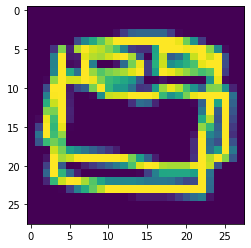

In [5]:
%matplotlib inline  
idx = randint(0, len(X_train))
plt.imshow(X_train[idx].reshape(28, 28)) 
print(class_names[int(y_train[idx].item())])

**Reshape and normalize each train and test image to 28x28 if not already**

In [4]:
image_size = 28
num_classes = 100

X_train = X_train.reshape(X_train.shape[0], image_size, image_size, 1)
X_test = X_test.reshape(X_test.shape[0], image_size, image_size, 1)

X_train /= 255.0
X_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

**Define Model Architecture**

In [5]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=X_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))  # The number here should be equal to number of classes

opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

/opt/homebrew/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Train the model**

In [6]:
model.fit(x = X_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=1, epochs=10)

2022-01-02 21:35:54.803524: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
3/3 [==============================] - 0s 63ms/step - loss: 4.6067 - top_k_categorical_accuracy: 0.0547 - val_loss: 4.6326 - val_top_k_categorical_accuracy: 0.0448
Epoch 2/10
3/3 [==============================] - 0s 26ms/step - loss: 4.5737 - top_k_categorical_accuracy: 0.1028 - val_loss: 4.6383 - val_top_k_categorical_accuracy: 0.0448
Epoch 3/10
3/3 [==============================] - 0s 26ms/step - loss: 4.5506 - top_k_categorical_accuracy: 0.1327 - val_loss: 4.6577 - val_top_k_categorical_accuracy: 0.0448
Epoch 4/10
3/3 [==============================] - 0s 27ms/step - loss: 4.5176 - top_k_categorical_accuracy: 0.1410 - val_loss: 4.6882 - val_top_k_categorical_accuracy: 0.0448
Epoch 5/10
3/3 [==============================] - 0s 25ms/step - loss: 4.4730 - top_k_categorical_accuracy: 0.1741 - val_loss: 4.7006 - val_top_k_categorical_accuracy: 0.0299
Epoch 6/10
3/3 [==============================] - 0s 26ms/step - loss: 4.4137 - top_k_categorical_accuracy: 0.1924 - val_loss

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 94.29%


**Use random test images to test the model**

['sword', 'knife', 'airplane', 'baseball_bat', 'pencil']


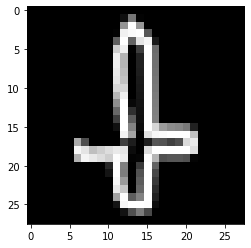

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze(),cmap='Greys_r') 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [ ]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [ ]:
model.save('keras.h5')